<a href="https://colab.research.google.com/github/kavananaik934/HandwrittenDigitReco.System/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand_Written_Digit_Classification

Objectives : The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors.

Import Library



In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


Import data

In [ ]:
from sklearn.datasets import load_digits

Describe Data

In [ ]:
df = load_digits()
print(df)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

Data Visualization

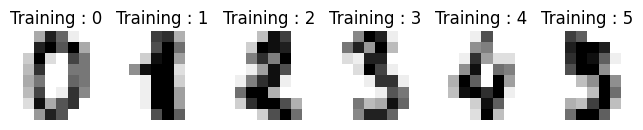

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize =(8,4))
for ax, image, label in zip(axes, df.images, df.target) :
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
      ax.set_title("Training : %i" % label)


Data Processing



In [ ]:
df.images.shape


(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape


(8, 8)

In [ ]:
len(df.images)



1797

In [ ]:
n_sample = len(df.images)
data = df.images.reshape(n_sample, -2)


In [ ]:
data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data.shape

(1797, 64)

Scalling Image data

In [ ]:
data.min()


0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

Predict test data

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([2, 0, 8, 0, 8, 9, 8, 0, 4, 8, 5, 1, 9, 5, 8, 1, 5, 4, 7, 7, 2, 6,
       5, 8, 4, 6, 8, 0, 7, 6, 4, 1, 8, 3, 4, 6, 8, 5, 8, 2, 8, 7, 6, 3,
       2, 8, 0, 4, 8, 8, 0, 3, 1, 1, 7, 2, 1, 9, 5, 0, 5, 9, 8, 9, 5, 8,
       0, 0, 5, 4, 4, 2, 2, 5, 3, 1, 0, 4, 6, 6, 3, 4, 6, 1, 7, 0, 5, 0,
       1, 9, 3, 9, 2, 5, 5, 5, 7, 9, 9, 6, 7, 6, 0, 1, 8, 3, 3, 4, 0, 1,
       2, 5, 4, 6, 3, 7, 6, 5, 9, 9, 1, 9, 4, 8, 7, 0, 7, 3, 8, 2, 8, 9,
       1, 5, 2, 8, 5, 9, 1, 5, 4, 7, 8, 4, 6, 7, 2, 7, 0, 6, 4, 0, 6, 5,
       3, 1, 5, 0, 0, 2, 3, 7, 4, 4, 6, 7, 4, 2, 0, 9, 5, 2, 0, 8, 0, 1,
       5, 7, 6, 8, 0, 2, 7, 4, 9, 9, 0, 8, 8, 8, 6, 3, 2, 6, 0, 8, 5, 0,
       0, 1, 3, 9, 2, 1, 0, 0, 4, 3, 8, 9, 4, 9, 5, 4, 1, 6, 3, 3, 8, 4,
       4, 0, 2, 9, 3, 6, 2, 7, 9, 1, 1, 1, 9, 5, 5, 0, 2, 5, 1, 0, 2, 1,
       3, 6, 5, 0, 9, 5, 1, 9, 2, 4, 8, 1, 0, 9, 5, 6, 0, 6, 3, 6, 6, 9,
       0, 3, 6, 8, 0, 3, 9, 8, 5, 0, 4, 8, 1, 4, 7, 9, 4, 8, 1, 3, 8, 4,
       7, 3, 8, 8, 3, 2, 3, 1, 6, 9, 4, 2, 8, 1, 3,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 50,  2,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 57,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 51]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.96      0.95        55
           2       1.00      1.00      1.00        49
           3       0.98      0.95      0.96        56
           4       0.98      0.98      0.98        58
           5       0.93      0.93      0.93        54
           6       0.96      0.96      0.96        50
           7       0.98      1.00      0.99        44
           8       0.98      0.93      0.96        61
           9       0.91      0.96      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

